# Q3 Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute

1. Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?
2. Does APP ID (Also known as package name) play any role in ranking?  
3. Any other pattern or good questions that you can think of and answer?


## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
data = pd.read_csv('browser_rankings_data.csv')
data.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,12/16/2020,net.fast.web.browser,12/18/2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,12/16/2020,com.android.chrome,12/18/2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,12/16/2020,com.opera.browser,2/27/2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,12/16/2020,com.opera.browser,12/18/2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [4]:
data.describe()

,ID,Rank
count,3066.000000,3050.000000
mean,57109.156230,15.155738
std,39290.651658,24.268403
min,1.000000,1.000000
25%,22484.000000,2.000000
50%,52427.000000,5.000000
75%,90683.750000,16.000000
max,131576.000000,134.000000


In [5]:
data.select_dtypes(include='object').columns

Index(['Keyword', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object')

In [6]:
data.select_dtypes(include='int64').columns

Index(['ID'], dtype='object')

In [7]:
data.shape

(3066, 10)

In [8]:
data.isnull().values.any()

True

In [9]:
data.isnull().values.sum()

16

In [10]:
data.isnull().sum()

ID                                  0
Keyword                             0
Rank                               16
Country                             0
Language                            0
Date                                0
App ID                              0
Date of Last Description Change     0
Short Description                   0
Long Description                    0
dtype: int64

## Dealing with Missing values

In [11]:
data['Rank'] = data['Rank'].fillna(data['Rank'].mean())

In [12]:
data.shape

(3066, 10)

In [13]:
data.isnull().values.any()

False

In [14]:
data.isnull().values.sum()

0

In [15]:
data.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,12/16/2020,net.fast.web.browser,12/18/2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,12/16/2020,com.android.chrome,12/18/2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,12/16/2020,com.opera.browser,2/27/2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,12/16/2020,com.opera.browser,12/18/2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


## Removing columns which are not useful for the question

In [16]:
data = data.drop(columns=['Country','Language'])

In [17]:
data

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,12/16/2020,net.fast.web.browser,12/18/2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,12/16/2020,com.android.chrome,12/18/2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,12/16/2020,com.opera.browser,2/27/2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,12/16/2020,com.opera.browser,12/18/2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
...,...,...,...,...,...,...,...,...
3061,131575,android browser,7.0,3/6/2021,com.opera.browser,12/18/2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
3062,131576,android browser,5.0,3/6/2021,com.cloudmosa.puffinTV,2/7/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3063,131576,android browser,5.0,3/6/2021,com.cloudmosa.puffinTV,2/6/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3064,131576,android browser,5.0,3/6/2021,com.cloudmosa.puffinTV,1/21/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


## Renaming the columns

In [18]:
data = data.rename(columns = {
    'App ID':'APPID' , 'Date of Last Description Change' : 'Last_des_change',
    'Short Description':'Short_Desc' , 'Long Description' : 'Long_Desc'
})

In [19]:
data.head()

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc
0,1,browser,2.0,12/16/2020,net.fast.web.browser,12/18/2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,12/16/2020,com.android.chrome,12/18/2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,12/16/2020,com.opera.browser,2/27/2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,12/16/2020,com.opera.browser,12/18/2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


## Checking for unique and duplicate values

In [20]:
data.Keyword.unique()

array(['browser', 'android browser', 'privacy browser',
       'privacy browsers for android', 'best privacy browsers',
       'fast browser', 'ad free browser'], dtype=object)

In [21]:
data.Date.unique()

array(['12/16/2020', '12/17/2020', '12/18/2020', '12/19/2020',
       '12/21/2020', '12/22/2020', '12/23/2020', '12/24/2020',
       '12/25/2020', '12/26/2020', '12/27/2020', '12/28/2020',
       '12/29/2020', '12/30/2020', '12/31/2020', '1/1/2021', '1/2/2021',
       '1/3/2021', '1/4/2021', '1/5/2021', '1/6/2021', '1/7/2021',
       '1/8/2021', '1/9/2021', '1/10/2021', '1/11/2021', '1/12/2021',
       '1/13/2021', '1/14/2021', '1/15/2021', '1/16/2021', '1/17/2021',
       '1/18/2021', '1/19/2021', '1/20/2021', '1/21/2021', '1/22/2021',
       '1/26/2021', '1/27/2021', '1/28/2021', '1/29/2021', '1/30/2021',
       '1/31/2021', '2/1/2021', '2/3/2021', '2/4/2021', '2/5/2021',
       '2/6/2021', '2/7/2021', '2/8/2021', '2/9/2021', '2/10/2021',
       '2/11/2021', '2/12/2021', '2/13/2021', '2/14/2021', '2/15/2021',
       '2/16/2021', '2/17/2021', '2/18/2021', '2/19/2021', '2/20/2021',
       '2/21/2021', '2/22/2021', '2/23/2021', '2/24/2021', '2/25/2021',
       '2/26/2021', '2/27/2021', 

In [22]:
data.duplicated().shape

(3066,)

In [23]:
data= data.drop_duplicates(keep='first').reset_index(drop=True)
data

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc
0,1,browser,2.0,12/16/2020,net.fast.web.browser,12/18/2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,12/16/2020,com.android.chrome,12/18/2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,12/16/2020,com.opera.browser,2/27/2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,12/16/2020,com.opera.browser,12/18/2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
...,...,...,...,...,...,...,...,...
3061,131575,android browser,7.0,3/6/2021,com.opera.browser,12/18/2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
3062,131576,android browser,5.0,3/6/2021,com.cloudmosa.puffinTV,2/7/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3063,131576,android browser,5.0,3/6/2021,com.cloudmosa.puffinTV,2/6/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3064,131576,android browser,5.0,3/6/2021,com.cloudmosa.puffinTV,1/21/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [24]:
data.APPID.value_counts()

com.duckduckgo.mobile.android    740
com.cloudmosa.puffinTV           608
com.brave.browser                370
com.vivaldi.browser              370
com.transsion.phoenix            370
com.opera.browser                304
net.fast.web.browser             152
com.android.chrome               152
Name: APPID, dtype: int64

### Visualizing APPID

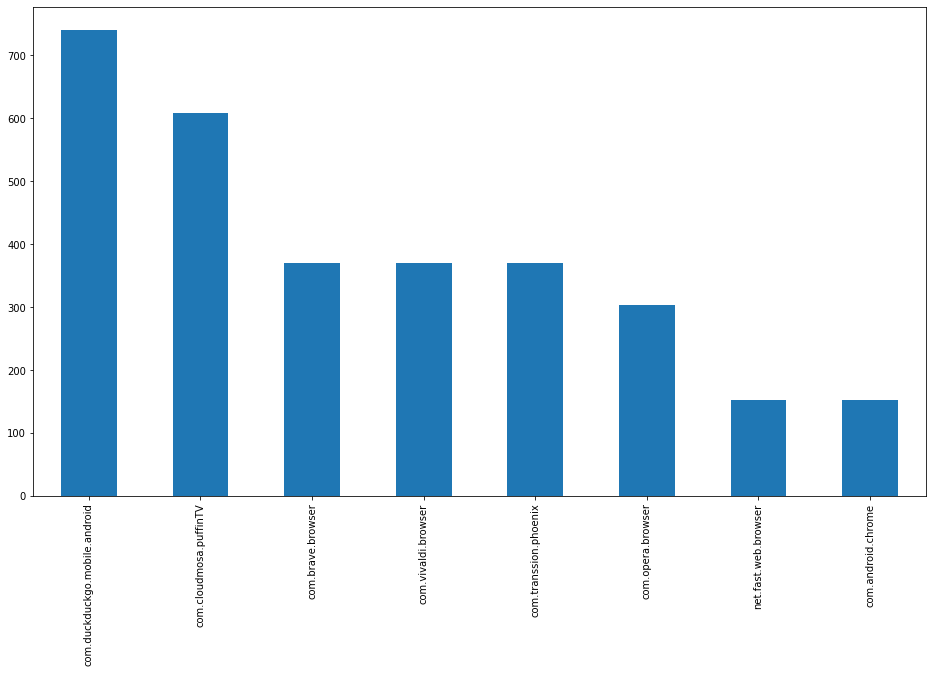

In [25]:
plt.figure(figsize=(16,9))
data['APPID'].value_counts().plot(kind="bar")
plt.show()

 From the graph, it can be noted that 'com.duckduckgo.mobile.android' has the highest ranking

## Visualizing APP ID with Rank 

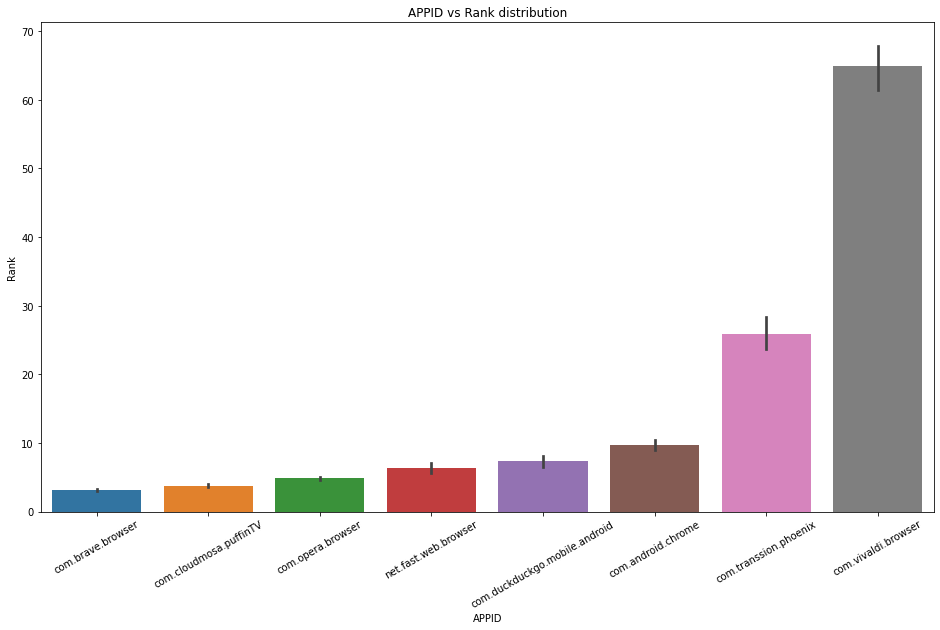

In [26]:
plt.figure(figsize=(16,9))

sns.barplot(x='APPID',y='Rank',data=data,order=data[['APPID','Rank']].groupby('APPID').mean().sort_values('Rank').reset_index().APPID)
plt.xticks(rotation=30)
plt.title('APPID vs Rank distribution')
plt.show()

## Data Cleaning

### Text Cleaning for Short Description

In [27]:
import re
import string
def clean_text(Short_Desc):
    'make thetext lower case,remove the squarebrackets,remove the text in punctuations and special characters'
    Short_Desc=re.sub('\[.*?\]','',str(Short_Desc))
    Short_Desc=re.sub('[%s]'%re.escape(string.punctuation),'',str(Short_Desc))
    Short_Desc=re.sub('\w*\d\w*','',str(Short_Desc))
    Short_Desc = re.sub("[0-9" "]+"," ",str(Short_Desc))
    Short_Desc = re.sub('[‘’“”…]', '', str(Short_Desc))
    Short_Desc=re.sub('https:\ $',' ',str(Short_Desc))
    Short_Desc=re.sub(" _'_ ",' ',str(Short_Desc))
    Short_Desc = re.sub('a{3}','',Short_Desc)
    Short_Desc=re.sub("[^A-Za-z" "]+"," ",Short_Desc).lower()
    return(Short_Desc)
clean=lambda x : clean_text(x)

In [28]:
data['Short_Desc'] =data.Short_Desc.apply(clean)
data.head()

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc
0,1,browser,2.0,12/16/2020,net.fast.web.browser,12/18/2020,the small fastest secure web browser best mobi...,"One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,12/16/2020,com.android.chrome,12/18/2020,fast simple and secure google chrome browser f...,"Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,12/16/2020,com.opera.browser,2/27/2021,fast safe web browser free vpn ad blocker qrco...,"Fast, safe and private, introducing the latest..."
3,3,browser,4.0,12/16/2020,com.opera.browser,12/18/2020,fast safe web browser free vpn ad blocker qrco...,"Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,puffin tv browser one app to watch all videos ...,Puffin TV Browser is a special edition of Puff...


### Text Cleaning for Long Description

In [29]:
import re
import string
def clean_text(Long_Desc):
    'make thetext lower case,remove the squarebrackets,remove the text in punctuations and special characters'
    Long_Desc=re.sub('\[.*?\]','',str(Long_Desc))
    Long_Desc=re.sub('[%s]'%re.escape(string.punctuation),'',str(Long_Desc))
    Long_Desc=re.sub('\w*\d\w*','',str(Long_Desc))
    Long_Desc = re.sub("[0-9" "]+"," ",str(Long_Desc))
    Long_Desc = re.sub('[‘’“”…]', '', str(Long_Desc))
    Long_Desc=re.sub('https:\ $',' ',str(Long_Desc))
    Long_Desc=re.sub(" _'_ ",' ',str(Long_Desc))
    Long_Desc = re.sub('a{3}','',Long_Desc)
    Long_Desc=re.sub("[^A-Za-z" "]+"," ",Long_Desc).lower()
    return(Long_Desc)
clean=lambda x : clean_text(x)

In [30]:
data['Long_Desc'] =data.Long_Desc.apply(clean)
data.head()

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc
0,1,browser,2.0,12/16/2020,net.fast.web.browser,12/18/2020,the small fastest secure web browser best mobi...,one of the smallest fastest secure web browser...
1,2,browser,3.0,12/16/2020,com.android.chrome,12/18/2020,fast simple and secure google chrome browser f...,google chrome is a fast easy to use and secure...
2,3,browser,4.0,12/16/2020,com.opera.browser,2/27/2021,fast safe web browser free vpn ad blocker qrco...,fast safe and private introducing the latest v...
3,3,browser,4.0,12/16/2020,com.opera.browser,12/18/2020,fast safe web browser free vpn ad blocker qrco...,opera is a fast safe web browser for your andr...
4,4,browser,1.0,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,puffin tv browser one app to watch all videos ...,puffin tv browser is a special edition of puff...


### Removing stopwords

In [31]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
data['Short_Desc']=data['Short_Desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['stopwords']= data['Short_Desc'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Short_Desc','stopwords']].head()

,Short_Desc,stopwords
0,small fastest secure web browser best mobile b...,0
1,fast simple secure google chrome browser andro...,0
2,fast safe web browser free vpn ad blocker qrco...,0
3,fast safe web browser free vpn ad blocker qrco...,0
4,puffin tv browser one app watch videos web,0


In [32]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
data['Long_Desc']=data['Long_Desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['stopwords']= data['Long_Desc'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Long_Desc','stopwords']].head()

,Long_Desc,stopwords
0,one smallest fastest secure web browser specif...,0
1,google chrome fast easy use secure web browser...,0
2,fast safe private introducing latest version o...,0
3,opera fast safe web browser android device fea...,0
4,puffin tv browser special edition puffin web b...,0


## Sentiment Analysis

In [33]:
import textblob
from textblob import TextBlob

In [34]:
def sentiment_anlysis(data):
    sentiment=TextBlob(data['Short_Desc']).sentiment
    return pd.Series([sentiment.polarity])
data[['polarity_short_des']]=data.apply(sentiment_anlysis,axis=1)
data.head()

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc,stopwords,polarity_short_des
0,1,browser,2.0,12/16/2020,net.fast.web.browser,12/18/2020,small fastest secure web browser best mobile b...,one smallest fastest secure web browser specif...,0,0.337500
1,2,browser,3.0,12/16/2020,com.android.chrome,12/18/2020,fast simple secure google chrome browser andro...,google chrome fast easy use secure web browser...,0,0.200000
2,3,browser,4.0,12/16/2020,com.opera.browser,2/27/2021,fast safe web browser free vpn ad blocker qrco...,fast safe private introducing latest version o...,0,0.366667
3,3,browser,4.0,12/16/2020,com.opera.browser,12/18/2020,fast safe web browser free vpn ad blocker qrco...,opera fast safe web browser android device fea...,0,0.366667
4,4,browser,1.0,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,puffin tv browser one app watch videos web,puffin tv browser special edition puffin web b...,0,0.000000


In [35]:
def sentiment_anlysis(data):
    sentiment=TextBlob(data['Long_Desc']).sentiment
    return pd.Series([sentiment.polarity])
data[['polarity_long_des']]=data.apply(sentiment_anlysis,axis=1)
data.head()

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc,stopwords,polarity_short_des,polarity_long_des
0,1,browser,2.0,12/16/2020,net.fast.web.browser,12/18/2020,small fastest secure web browser best mobile b...,one smallest fastest secure web browser specif...,0,0.337500,0.323434
1,2,browser,3.0,12/16/2020,com.android.chrome,12/18/2020,fast simple secure google chrome browser andro...,google chrome fast easy use secure web browser...,0,0.200000,0.184701
2,3,browser,4.0,12/16/2020,com.opera.browser,2/27/2021,fast safe web browser free vpn ad blocker qrco...,fast safe private introducing latest version o...,0,0.366667,0.195667
3,3,browser,4.0,12/16/2020,com.opera.browser,12/18/2020,fast safe web browser free vpn ad blocker qrco...,opera fast safe web browser android device fea...,0,0.366667,0.195164
4,4,browser,1.0,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,puffin tv browser one app watch videos web,puffin tv browser special edition puffin web b...,0,0.000000,0.152101


In [36]:
data['len_short_des']=data['Short_Desc'].apply(lambda x : len(x))
data.head(5)

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc,stopwords,polarity_short_des,polarity_long_des,len_short_des
0,1,browser,2.0,12/16/2020,net.fast.web.browser,12/18/2020,small fastest secure web browser best mobile b...,one smallest fastest secure web browser specif...,0,0.337500,0.323434,71
1,2,browser,3.0,12/16/2020,com.android.chrome,12/18/2020,fast simple secure google chrome browser andro...,google chrome fast easy use secure web browser...,0,0.200000,0.184701,63
2,3,browser,4.0,12/16/2020,com.opera.browser,2/27/2021,fast safe web browser free vpn ad blocker qrco...,fast safe private introducing latest version o...,0,0.366667,0.195667,77
3,3,browser,4.0,12/16/2020,com.opera.browser,12/18/2020,fast safe web browser free vpn ad blocker qrco...,opera fast safe web browser android device fea...,0,0.366667,0.195164,77
4,4,browser,1.0,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,puffin tv browser one app watch videos web,puffin tv browser special edition puffin web b...,0,0.000000,0.152101,42


In [37]:
data['len_long_des']=data['Long_Desc'].apply(lambda x : len(x))
data.head(5)

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc,stopwords,polarity_short_des,polarity_long_des,len_short_des,len_long_des
0,1,browser,2.0,12/16/2020,net.fast.web.browser,12/18/2020,small fastest secure web browser best mobile b...,one smallest fastest secure web browser specif...,0,0.337500,0.323434,71,972
1,2,browser,3.0,12/16/2020,com.android.chrome,12/18/2020,fast simple secure google chrome browser andro...,google chrome fast easy use secure web browser...,0,0.200000,0.184701,63,1879
2,3,browser,4.0,12/16/2020,com.opera.browser,2/27/2021,fast safe web browser free vpn ad blocker qrco...,fast safe private introducing latest version o...,0,0.366667,0.195667,77,2272
3,3,browser,4.0,12/16/2020,com.opera.browser,12/18/2020,fast safe web browser free vpn ad blocker qrco...,opera fast safe web browser android device fea...,0,0.366667,0.195164,77,2802
4,4,browser,1.0,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,puffin tv browser one app watch videos web,puffin tv browser special edition puffin web b...,0,0.000000,0.152101,42,1038


## Correlation

### Transforming the Data

In [38]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
data["Keyword"]=lm.fit_transform(data["Keyword"])
data["APPID"]=lm.fit_transform(data["APPID"])
data["Short_Desc"]=lm.fit_transform(data["Short_Desc"])
data["Long_Desc"]=lm.fit_transform(data["Long_Desc"])
data["Date"]=lm.fit_transform(data["Date"])
data["Last_des_change"]=lm.fit_transform(data["Last_des_change"])
data.head()

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc,stopwords,polarity_short_des,polarity_long_des,len_short_des,len_long_des
0,1,3,2.0,28,7,1,7,2,0,0.337500,0.323434,71,972
1,2,3,3.0,28,0,1,3,1,0,0.200000,0.184701,63,1879
2,3,3,4.0,28,4,3,2,0,0,0.366667,0.195667,77,2272
3,3,3,4.0,28,4,1,2,3,0,0.366667,0.195164,77,2802
4,4,3,1.0,28,2,5,6,7,0,0.000000,0.152101,42,1038


In [39]:
# dropping stopwords column 
data = data.drop(columns='stopwords')
data.head()

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc,polarity_short_des,polarity_long_des,len_short_des,len_long_des
0,1,3,2.0,28,7,1,7,2,0.337500,0.323434,71,972
1,2,3,3.0,28,0,1,3,1,0.200000,0.184701,63,1879
2,3,3,4.0,28,4,3,2,0,0.366667,0.195667,77,2272
3,3,3,4.0,28,4,1,2,3,0.366667,0.195164,77,2802
4,4,3,1.0,28,2,5,6,7,0.000000,0.152101,42,1038


In [40]:
data.corr()

,ID,Keyword,Rank,Date,APPID,Last_des_change,Short_Desc,Long_Desc,polarity_short_des,polarity_long_des,len_short_des,len_long_des
ID,1.000000,0.001623,0.008339,0.709450,0.000907,-0.001617,-0.002644,0.002429,-0.000819,-0.001600,0.001571,0.001237
Keyword,0.001623,1.000000,0.103475,0.001927,0.067906,-0.120922,-0.197668,0.181591,-0.061148,-0.119549,0.117559,0.092638
Rank,0.008339,0.103475,1.000000,0.002880,0.525816,-0.190326,-0.215333,0.337756,-0.180579,0.006494,0.158900,0.352552
Date,0.709450,0.001927,0.002880,1.000000,0.001023,-0.001821,-0.002977,0.002735,-0.000921,-0.001801,0.001771,0.001395
APPID,0.000907,0.067906,0.525816,0.001023,1.000000,-0.166399,-0.090552,0.124045,0.072865,0.032789,0.308775,0.226964
Last_des_change,-0.001617,-0.120922,-0.190326,-0.001821,-0.166399,1.000000,0.136335,-0.076698,-0.175069,-0.059165,-0.356534,-0.275141
Short_Desc,-0.002644,-0.197668,-0.215333,-0.002977,-0.090552,0.136335,1.000000,-0.529165,0.297562,0.686746,-0.242951,0.029157
Long_Desc,0.002429,0.181591,0.337756,0.002735,0.124045,-0.076698,-0.529165,1.000000,-0.852096,-0.675352,-0.427328,-0.381420
polarity_short_des,-0.000819,-0.061148,-0.180579,-0.000921,0.072865,-0.175069,0.297562,-0.852096,1.000000,0.738521,0.794529,0.625393
polarity_long_des,-0.001600,-0.119549,0.006494,-0.001801,0.032789,-0.059165,0.686746,-0.675352,0.738521,1.000000,0.441524,0.548019


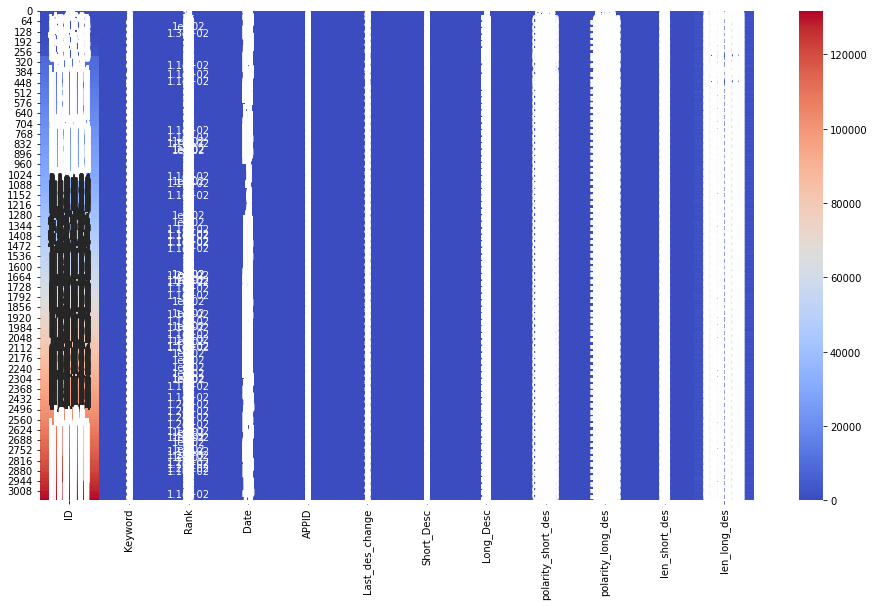

In [42]:
plt.figure(figsize=(16,9))
df=sns.heatmap(data,cmap="coolwarm",annot=True)

#For checking correlation between two features, statstical hypothesis test called Chi square is used :

H0 : There is no relation between the variables
H1 : There is relation between the variables 
    
we can verify hypothesis using P-value, that is if the P-value is greater than 0.05, H0 will be accepted otherwise rejected

In [43]:
from scipy.stats import chi2_contingency

In [46]:
# Short Description and Long Description
SL_des = pd.crosstab( data['Short_Desc'],data['Long_Desc'])
stats = chi2_contingency(SL_des)
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 21462.0 , dof is 84


As the p-Value is 0 , i.e less than 0.5 , we can say there is a correlation between Short and Long Description

In [47]:
# Short Description and Rank
SL_des = pd.crosstab( data['Short_Desc'],data['Rank'])
stats = chi2_contingency(SL_des)
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 6131.206530921566 , dof is 833


As the p-Value is 0 , i.e less than 0.5 , we can say there is a correlation between Short Description and Rank

In [49]:
# Long Description and Rank
SL_des = pd.crosstab( data['Long_Desc'],data['Rank'])
stats = chi2_contingency(SL_des)
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 6131.206530921565 , dof is 1428


As the p-Value is 0 , i.e less than 0.5 , we can say there is a correlation between Long Description and Rank

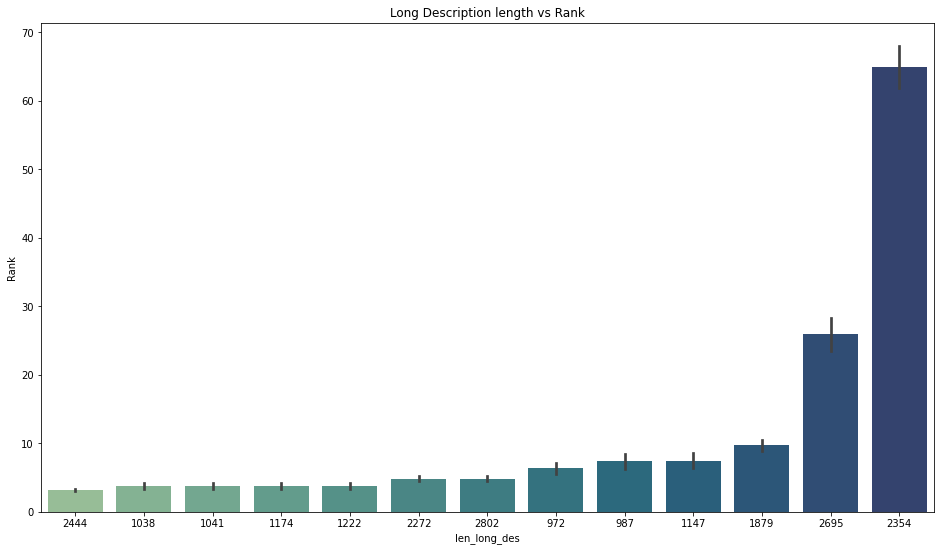

In [51]:
plt.figure(figsize=(16,9))

sns.barplot(x='len_long_des',y='Rank',data=data,palette='crest',order=data[['len_long_des','Rank']].groupby('len_long_des').mean().sort_values('Rank').reset_index().len_long_des)
plt.title('Long Description length vs Rank')
plt.show()

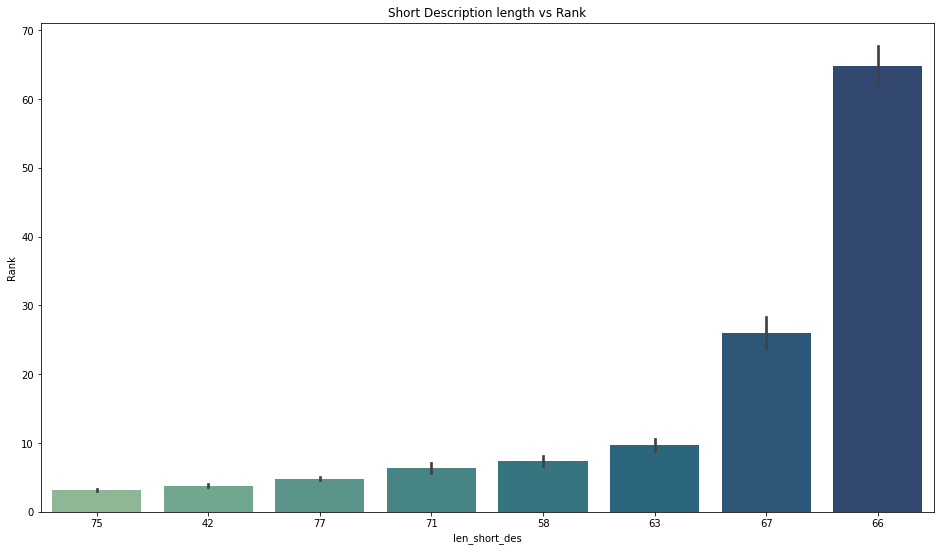

In [52]:
plt.figure(figsize=(16,9))

sns.barplot(x='len_short_des',y='Rank',data=data,palette='crest',order=data[['len_short_des','Rank']].groupby('len_short_des').mean().sort_values('Rank').reset_index().len_short_des)
plt.title('Short Description length vs Rank')
plt.show()

# Q1 Is there any co-relation between short description, long description and ranking?

Yes there is the Correlation between the short description ,Long description and Ranking , as we have found it using the hypothesis and also from the barplot as shown above.

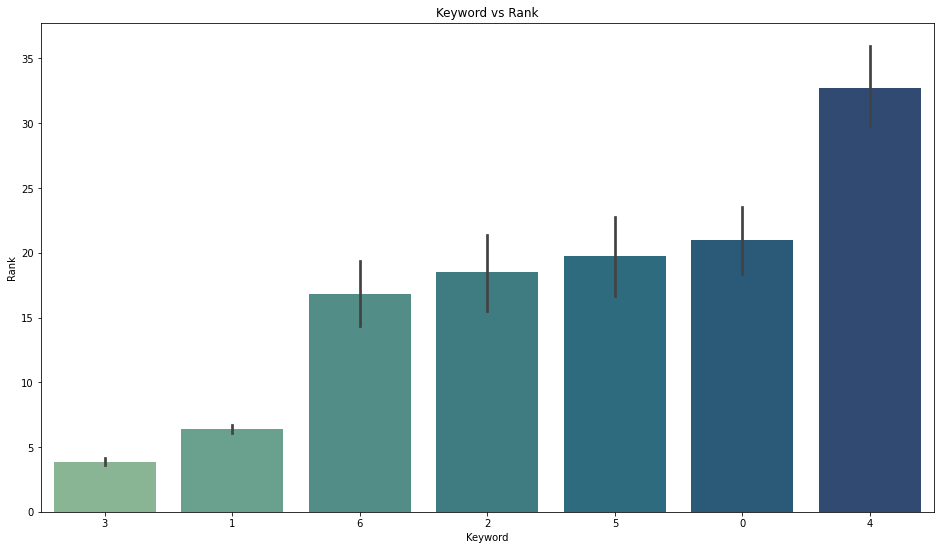

In [55]:
plt.figure(figsize=(16,9))

sns.barplot(x='Keyword',y='Rank',data=data,palette='crest',order=data[['Keyword','Rank']].groupby('Keyword').mean().sort_values('Rank').reset_index().Keyword)
plt.title('Keyword vs Rank')
plt.show()

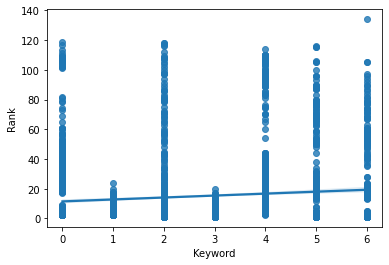

In [56]:
sns.regplot(x=data.Keyword,y=data.Rank)
plt.show()

In [57]:
KeyRank_des = pd.crosstab( data['Keyword'],data['Rank'])
stats = chi2_contingency(KeyRank_des)
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 3332.033956865748 , dof is 714


Since the value of P-value is 0 , there is a correlation between Keyword and Rank

# Q2 Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?

Sorry I did not understand this question

# Q3 Does APP ID (Also known as package name) play any role in ranking?

Rank is most positively correlated with AppID among the features, these are significantly positive corrrelation with each other and change in one will significantly change other i.e. increment in App ID will increase R

# Q4 Any other pattern or good questions that you can think of and answer?

### Most frequent words in Long and Short Description

NA